# Softmax Function
In this lab, we will explore the softmax function. This function is used in both Softmax Regression and in Neural Networks when solving Multiclass Classification problems.  

  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
#%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

> **Note**: Normally, in this course, the notebooks use the convention of starting counts with 0 and ending with N-1,  $\sum_{i=0}^{N-1}$, while lectures start with 1 and end with N,  $\sum_{i=1}^{N}$. This is because code will typically start iteration with 0 while in lecture, counting 1 to N leads to cleaner, more succinct equations. This notebook has more equations than is typical for a lab and thus  will break with the convention and will count 1 to N.

## Softmax Function
In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.


The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.  
Let's create a NumPy implementation:


In [8]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

Below, vary the values of the `z` inputs using the sliders.

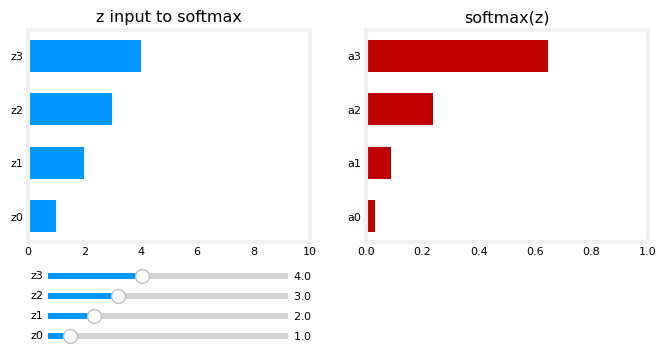

In [10]:
plt.close("all")
plt_softmax(my_softmax)

As you are varying the values of the z's above, there are a few things to note:
* the exponential in the numerator of the softmax magnifies small differences in the values 
* the output values sum to one
* the softmax spans all of the outputs. A change in `z0` for example will change the values of `a0`-`a3`. Compare this to other activations such as ReLU or Sigmoid which have a single input and single output.

## Cost

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


## Tensorflow
This lab will discuss two ways of implementing the softmax, cross-entropy loss in Tensorflow, the 'obvious' method and the 'preferred' method. The former is the most straightforward while the latter is more numerically stable.

Let's start by creating a dataset to train a multiclass classification model.


In [11]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

### The *Obvious* organization

The model below is implemented with the softmax as an activation in the final Dense layer.
The loss function is separately specified in the `compile` directive. 

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities. 

In [12]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 2s 1ms/step - loss: 0.9603
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3094
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0661
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0554
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0370


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [13]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[4.81e-04 7.38e-03 9.71e-01 2.12e-02]
 [9.97e-01 2.71e-03 2.24e-06 2.92e-07]]
largest value 0.9999996 smallest value 1.7666174e-11


### Preferred
Recall from lecture, more stable and accurate results can be obtained if the softmax and loss are combined during training.   This is enabled by the 'preferred' organization shown here.

In the preferred organization the final layer has a linear activation. For historical reasons, the outputs in this form are referred to as *logits*. The loss function has an additional argument: `from_logits = True`. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.

In [14]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)



Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 1.1594
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4510
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1070
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0646
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0523
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0451


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

In [15]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-1.31 -1.39  4.27  0.29]
 [ 5.25  0.52 -3.22 -6.44]]
largest value 15.156066 smallest value -13.871068


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).

In [16]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[3.67e-03 3.39e-03 9.75e-01 1.82e-02]
 [9.91e-01 8.82e-03 2.08e-04 8.36e-06]]
largest value 0.9999979 smallest value 2.4755686e-13


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [17]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-1.31 -1.39  4.27  0.29], category: 2
[ 5.25  0.52 -3.22 -6.44], category: 0
[ 3.84  0.79 -2.5  -5.26], category: 0
[-0.95  4.14 -1.79 -3.  ], category: 1
[ 0.32 -2.79  5.36 -2.17], category: 2


# Multi-class Classification

## 1.1 Goals
In this lab, you will explore an example of multi-class classification using neural networks.


## 1.2 Tools
You will use some plotting routines. These are stored in `lab_utils_multiclass_TF.py` in this directory.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Multi-class Classification
Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category. 

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

## 2.1 Prepare and visualize our data
We will use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.

In [20]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

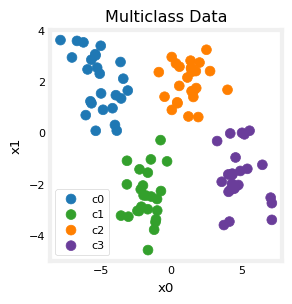

In [21]:
plt_mc(X_train,y_train,classes, centers, std=std)

Each dot represents a training example. The axis (x0,x1) are the inputs and the color represents the class the example is associated with. Once trained, the model will be presented with a new example, (x0,x1), and will predict the class.  

While generated, this data set is representative of many real-world classification problems. There are several input features (x0,...,xn) and several output categories. The model is trained to use the input features to predict the correct output category.

In [22]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 Model

This lab will use a 2-layer network as shown.

Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.   

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a `linear` rather than a `softmax` activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [23]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

The statements below compile and train the network. Setting `from_logits=True` as an argument to the loss function specifies that the output activation was linear rather than a softmax.

In [24]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 1.4392
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3521
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2778
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2071
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1381
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0815
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0222
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9712
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9274
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8897
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8523
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8192
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

With the model trained, we can see how the model has classified the training data.

184/184 [==============================] - 0s 1ms/step


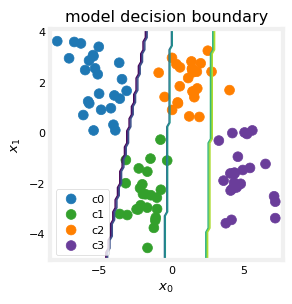

In [25]:
plt_cat_mc(X_train, y_train, model, classes)

Above, the decision boundaries show how the model has partitioned the input space.  This very simple model has had no trouble classifying the training data. How did it accomplish this? Let's look at the network in more detail. 

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how the layers combine to solve a classification problem.

In [26]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

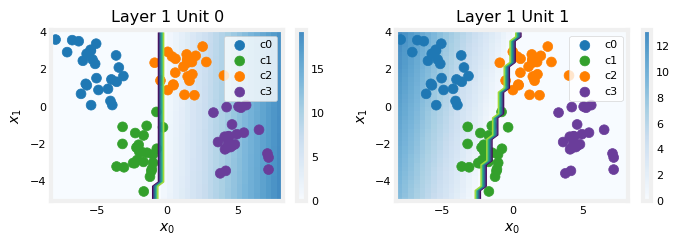

In [27]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

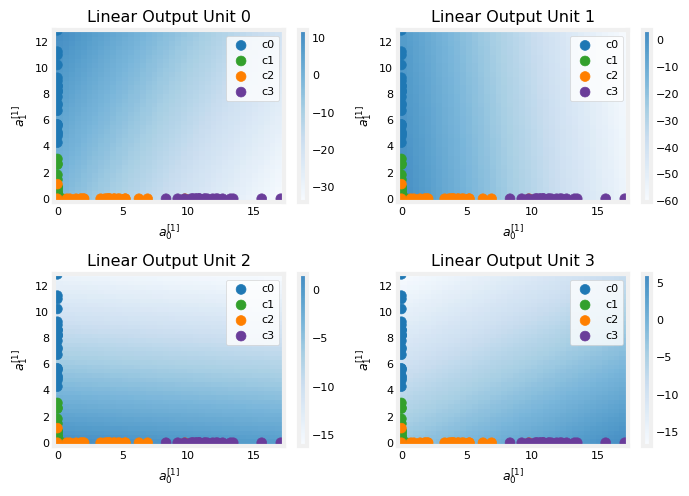

In [28]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ($x_0,x_1$) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. 
The contour lines in this graph show the transition point between the output, $a^{[1]}_j$ being zero and non-zero. Recall the graph for a ReLu :<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.  
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!

#### Layer 2, the output layer  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer $a^{[1]}_0$ and $a^{[1]}_1$. As predicted above, classes 0 and 1 (blue and green) have  $a^{[1]}_0 = 0$ while classes 0 and 2 (blue and orange) have $a^{[1]}_1 = 0$.  
Once again, the intensity of the background color indicates the highest values.  
Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.    
Unit 1 produces its highest values in the upper left corner selecting class 1 (green).  
Unit 2 targets the lower right corner where class 2 (orange) resides.  
Unit 3 produces its highest values in the upper right selecting our final class (purple).  

One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done by the implied softmax function that is part of the loss function (`SparseCategoricalCrossEntropy`). Unlike other activation functions, the softmax works across all the outputs.

You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition about what is happening under the hood.